In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [162]:
unsubscribe = pd.read_csv('data2/unsubscribe_request.csv')
unsubscribe

,id,user_id,name,time
0,518306,94164,Unsubscribe Request,2022-03-03 14:28:55.531344
1,521380,93519,Unsubscribe Request,2022-03-03 15:55:39.548989
2,525897,94148,Unsubscribe Request,2022-03-03 17:52:37.111536
3,525919,94148,Unsubscribe Request,2022-03-03 17:53:28.107955
4,531102,93551,Unsubscribe Request,2022-03-03 21:24:33.343626
...,...,...,...,...
2397,8013071,118016,Unsubscribe Request,2022-10-12 00:26:23.990159
2398,8019936,116344,Unsubscribe Request,2022-10-12 09:14:59.494106
2399,8019965,98508,Unsubscribe Request,2022-10-12 09:17:35.888151
2400,8029891,117208,Unsubscribe Request,2022-10-12 14:04:03.066877


In [163]:
subscribe = pd.read_csv('data2/subscription_log.csv')
subscribe.head()

,id,user_id,end_date,price,created_at,refund_id,point,target_customer
0,237,6482,2019-08-12 00:00:00,100.0,2019-07-12 18:13:14.541176,NaN,NaN,personal
1,239,6574,2019-08-12 00:00:00,100.0,2019-07-12 19:26:47.48333,NaN,NaN,personal
2,252,6704,2019-08-16 00:00:00,100.0,2019-07-16 09:21:31.787566,NaN,NaN,personal
3,258,4709,2019-08-16 00:00:00,9900.0,2019-07-17 07:00:11.666693,NaN,NaN,personal
4,259,6748,2019-08-17 00:00:00,100.0,2019-07-17 10:33:39.975256,NaN,NaN,personal


In [164]:
subscribe_groupby_count = pd.DataFrame(subscribe.groupby('target_customer')['price'].count())
subscribe_groupby_count.columns = ['count']
subscribe_groupby_count

,count
target_customer,
bigBiz,6
middleBiz,208
personal,27690
smallBiz,2951


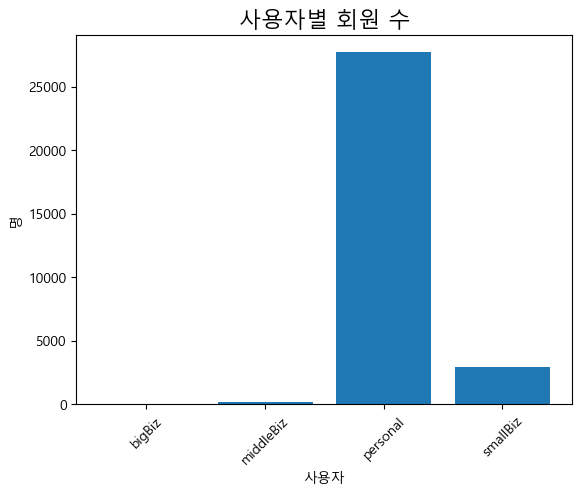

In [165]:
plt.title('사용자별 회원 수', size=16)
plt.bar(subscribe.groupby('target_customer')['price'].count().index, subscribe.groupby('target_customer')['price'].count())
plt.xlabel('사용자', size = 10)
plt.ylabel('명', size = 10)
plt.xticks(rotation=45)

plt.show()

In [166]:
subscribe_groupby_price_sum = pd.DataFrame(subscribe.groupby('target_customer')['price'].sum().round())
subscribe_groupby_price_sum.columns = ['price_sum']
subscribe_groupby_price_sum

,price_sum
target_customer,
bigBiz,3935340.0
middleBiz,29295300.0
personal,215020305.0
smallBiz,166425030.0


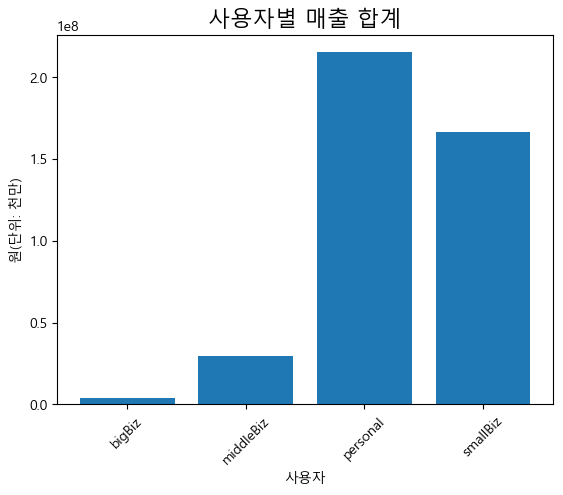

In [167]:
plt.title('사용자별 매출 합계', size=16)
plt.bar(subscribe.groupby('target_customer')['price'].sum().index, subscribe.groupby('target_customer')['price'].sum())
plt.xlabel('사용자', size = 10)
plt.ylabel('원(단위: 천만)', size = 10)
plt.xticks(rotation=45)

plt.show()

In [168]:
subscribe_groupby_price_mean = pd.DataFrame(subscribe.groupby('target_customer')['price'].mean().round())
subscribe_groupby_price_mean.columns = ['price_mean']
subscribe_groupby_price_mean

,price_mean
target_customer,
bigBiz,655890.0
middleBiz,140843.0
personal,7765.0
smallBiz,56396.0


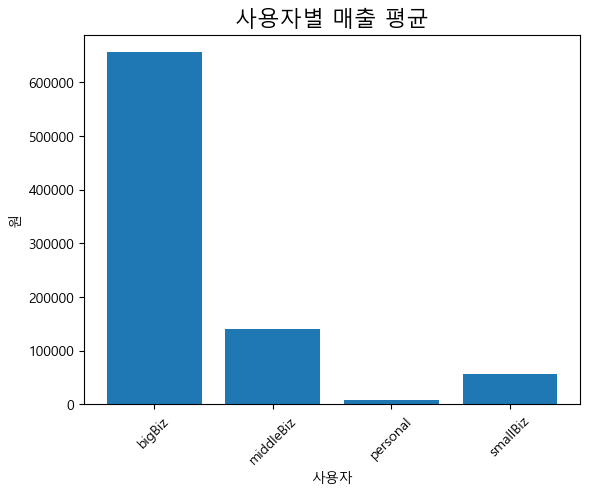

In [169]:
plt.title('사용자별 매출 평균', size=16)
plt.bar(subscribe.groupby('target_customer')['price'].mean().index, subscribe.groupby('target_customer')['price'].mean())
plt.xlabel('사용자', size = 10)
plt.ylabel('원', size = 10)
plt.xticks(rotation=45)

plt.show()

In [170]:
# 구독료 100원 이하인 데이터 추출

subscribe_row = subscribe[subscribe['price'] <= 100]
subscribe_row.head()

,id,user_id,end_date,price,created_at,refund_id,point,target_customer
0,237,6482,2019-08-12 00:00:00,100.0,2019-07-12 18:13:14.541176,NaN,NaN,personal
1,239,6574,2019-08-12 00:00:00,100.0,2019-07-12 19:26:47.48333,NaN,NaN,personal
2,252,6704,2019-08-16 00:00:00,100.0,2019-07-16 09:21:31.787566,NaN,NaN,personal
4,259,6748,2019-08-17 00:00:00,100.0,2019-07-17 10:33:39.975256,NaN,NaN,personal
5,270,1417,2019-08-18 00:00:00,100.0,2019-07-18 15:59:47.058971,NaN,NaN,personal


In [206]:
merge_sub_unsub2 = subscribe.merge(right=unsubscribe, left_on='user_id', right_on='user_id')
merge_sub_unsub2.head()

merge_sub_unsub_time2 = merge_sub_unsub2[['user_id', 'created_at', 'time', 'target_customer']]
merge_sub_unsub_time2.columns = ['user_id', 'time_sub', 'time_unsub', 'target_customer']
merge_sub_unsub_time2.head()

merge_sub_unsub_time2['time_sub'] = merge_sub_unsub_time2['time_sub'].str.split(' ').str[0]
merge_sub_unsub_time2['time_unsub'] = merge_sub_unsub_time2['time_unsub'].str.split(' ').str[0]

merge_sub_unsub_time2['time_sub'] = pd.to_datetime(merge_sub_unsub_time2['time_sub'])
merge_sub_unsub_time2['time_unsub'] = pd.to_datetime(merge_sub_unsub_time2['time_unsub'])

merge_sub_unsub_time2['period'] = merge_sub_unsub_time2['time_unsub'] - merge_sub_unsub_time2['time_sub']
# merge_sub_unsub_time2['period'] = merge_sub_unsub_time2['period'].dt.days

merge_sub_unsub_time2[(merge_sub_unsub_time2['period'].dt.days >= 0) & (merge_sub_unsub_time2['period'].dt.days <= 31) & (merge_sub_unsub_time2['target_customer'] == 'middleBiz')]

C:\Users\jhc74\AppData\Local\Temp\ipykernel_12572\2174600584.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_sub_unsub_time2['time_sub'] = merge_sub_unsub_time2['time_sub'].str.split(' ').str[0]
C:\Users\jhc74\AppData\Local\Temp\ipykernel_12572\2174600584.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_sub_unsub_time2['time_unsub'] = merge_sub_unsub_time2['time_unsub'].str.split(' ').str[0]
C:\Users\jhc74\AppData\Local\Temp\ipykernel_12572\2174600584.py:11: SettingWithCopyWarning: 
A val

,user_id,time_sub,time_unsub,target_customer,period
874,53592,2022-04-11,2022-04-29,middleBiz,18 days
1768,39817,2022-05-10,2022-05-31,middleBiz,21 days
1769,39817,2022-05-10,2022-05-31,middleBiz,21 days
1770,39817,2022-05-10,2022-05-31,middleBiz,21 days
1771,39817,2022-05-10,2022-06-01,middleBiz,22 days
1773,39817,2022-05-11,2022-05-31,middleBiz,20 days
1774,39817,2022-05-11,2022-05-31,middleBiz,20 days
1775,39817,2022-05-11,2022-05-31,middleBiz,20 days
1776,39817,2022-05-11,2022-06-01,middleBiz,21 days
1778,39817,2022-05-11,2022-05-31,middleBiz,20 days


In [199]:
merge_sub_unsub_time2 = merge_sub_unsub2[['user_id', 'created_at', 'time', 'target_customer']]
merge_sub_unsub_time2.columns = ['user_id', 'time_sub', 'time_unsub', 'target_customer']
merge_sub_unsub_time2.head()

,user_id,time_sub,time_unsub,target_customer
0,1,2019-08-09 10:04:42.723147,2022-05-10 13:36:12.813212,smallBiz
1,1,2019-08-09 10:04:42.723147,2022-06-14 16:53:18.721922,smallBiz
2,1,2019-08-09 10:04:44.120191,2022-05-10 13:36:12.813212,smallBiz
3,1,2019-08-09 10:04:44.120191,2022-06-14 16:53:18.721922,smallBiz
4,1,2020-07-16 14:07:01.603094,2022-05-10 13:36:12.813212,personal


In [171]:
# 구독료 100원 이하인 데이터와 구독 해지 데이터 merge

merge_sub_unsub = subscribe_row.merge(right=unsubscribe, left_on='user_id', right_on='user_id')
merge_sub_unsub.head()

,id_x,user_id,end_date,price,created_at,refund_id,point,target_customer,id_y,name,time
0,41119,26989,2020-12-10 00:00:00,0.0,2020-11-26 11:25:42.795699,NaN,0.0,personal,4639881,Unsubscribe Request,2022-06-28 10:50:41.200653
1,42243,45262,2020-12-14 00:00:00,0.0,2020-11-30 21:52:36.454176,NaN,0.0,personal,1827482,Unsubscribe Request,2022-04-18 09:40:52.799068
2,42987,45938,2020-12-18 00:00:00,0.0,2020-12-04 16:43:45.906505,NaN,0.0,personal,1006527,Unsubscribe Request,2022-03-22 08:27:46.566098
3,43776,46427,2020-12-21 00:00:00,0.0,2020-12-07 21:15:29.359179,NaN,0.0,personal,1040891,Unsubscribe Request,2022-03-23 10:14:06.885395
4,44994,47371,2020-12-26 00:00:00,0.0,2020-12-12 23:49:27.949742,NaN,0.0,personal,2513264,Unsubscribe Request,2022-05-09 08:36:09.121233


In [172]:
# merge 데이터 필요한 열만 추출, 열 이름 변경

merge_sub_unsub_time = merge_sub_unsub[['user_id', 'created_at', 'time', 'target_customer']]
merge_sub_unsub_time.columns = ['user_id', 'time_sub', 'time_unsub', 'target_customer']
merge_sub_unsub_time.head()

,user_id,time_sub,time_unsub,target_customer
0,26989,2020-11-26 11:25:42.795699,2022-06-28 10:50:41.200653,personal
1,45262,2020-11-30 21:52:36.454176,2022-04-18 09:40:52.799068,personal
2,45938,2020-12-04 16:43:45.906505,2022-03-22 08:27:46.566098,personal
3,46427,2020-12-07 21:15:29.359179,2022-03-23 10:14:06.885395,personal
4,47371,2020-12-12 23:49:27.949742,2022-05-09 08:36:09.121233,personal


In [173]:
# 구독 날짜, 구독 해지 날짜 시계열 데이터로 변환

# 년,월,일 만 추출

merge_sub_unsub_time['time_sub'] = merge_sub_unsub_time['time_sub'].str.split(' ').str[0]
merge_sub_unsub_time['time_unsub'] = merge_sub_unsub_time['time_unsub'].str.split(' ').str[0]

# 시계열 데이터로 변환

merge_sub_unsub_time['time_sub'] = pd.to_datetime(merge_sub_unsub_time['time_sub'])
merge_sub_unsub_time['time_unsub'] = pd.to_datetime(merge_sub_unsub_time['time_unsub'])

merge_sub_unsub_time.dtypes

C:\Users\jhc74\AppData\Local\Temp\ipykernel_12572\2138014221.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_sub_unsub_time['time_sub'] = merge_sub_unsub_time['time_sub'].str.split(' ').str[0]
C:\Users\jhc74\AppData\Local\Temp\ipykernel_12572\2138014221.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_sub_unsub_time['time_unsub'] = merge_sub_unsub_time['time_unsub'].str.split(' ').str[0]
C:\Users\jhc74\AppData\Local\Temp\ipykernel_12572\2138014221.py:10: SettingWithCopyWarning: 
A value i

user_id                     int64
time_sub           datetime64[ns]
time_unsub         datetime64[ns]
target_customer            object
dtype: object

In [174]:
merge_sub_unsub_time

,user_id,time_sub,time_unsub,target_customer
0,26989,2020-11-26,2022-06-28,personal
1,45262,2020-11-30,2022-04-18,personal
2,45938,2020-12-04,2022-03-22,personal
3,46427,2020-12-07,2022-03-23,personal
4,47371,2020-12-12,2022-05-09,personal
...,...,...,...,...
2355,117841,2022-10-10,2022-10-11,personal
2356,117853,2022-10-10,2022-10-10,personal
2357,117911,2022-10-11,2022-10-11,personal
2358,117989,2022-10-11,2022-10-11,personal


In [175]:
# 구독해지 날짜 - 구독 시작 날짜

merge_sub_unsub_time['period'] = merge_sub_unsub_time['time_unsub'] - merge_sub_unsub_time['time_sub']
merge_sub_unsub_time[(merge_sub_unsub_time['period'].dt.days >= 0) & (merge_sub_unsub_time['period'].dt.days <= 31)]

C:\Users\jhc74\AppData\Local\Temp\ipykernel_12572\354931746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_sub_unsub_time['period'] = merge_sub_unsub_time['time_unsub'] - merge_sub_unsub_time['time_sub']


,user_id,time_sub,time_unsub,target_customer,period
95,62227,2022-03-08,2022-04-06,personal,29 days
102,62227,2022-04-21,2022-05-20,personal,29 days
319,92391,2022-05-18,2022-06-16,personal,29 days
320,92391,2022-05-18,2022-06-16,personal,29 days
321,92461,2022-02-10,2022-03-13,personal,31 days
...,...,...,...,...,...
2355,117841,2022-10-10,2022-10-11,personal,1 days
2356,117853,2022-10-10,2022-10-10,personal,0 days
2357,117911,2022-10-11,2022-10-11,personal,0 days
2358,117989,2022-10-11,2022-10-11,personal,0 days


In [176]:
merge_sub_unsub_time[(merge_sub_unsub_time['period'].dt.days > 30) & (merge_sub_unsub_time['period'].dt.days <= 90)]

,user_id,time_sub,time_unsub,target_customer,period
67,64006,2021-12-13,2022-03-08,personal,85 days
96,62227,2022-03-08,2022-05-20,personal,73 days
103,62227,2022-04-21,2022-06-18,personal,58 days
104,62227,2022-04-21,2022-06-21,personal,61 days
111,62227,2022-07-09,2022-10-05,personal,88 days
...,...,...,...,...,...
2143,113794,2022-08-30,2022-10-05,personal,36 days
2144,113794,2022-08-30,2022-10-05,personal,36 days
2150,113896,2022-08-30,2022-10-09,personal,40 days
2169,44778,2022-09-02,2022-10-06,personal,34 days


In [177]:
merge_sub_unsub_time[(merge_sub_unsub_time['period'].dt.days > 70) & (merge_sub_unsub_time['period'].dt.days <= 100)]

,user_id,time_sub,time_unsub,target_customer,period
67,64006,2021-12-13,2022-03-08,personal,85 days
96,62227,2022-03-08,2022-05-20,personal,73 days
111,62227,2022-07-09,2022-10-05,personal,88 days
112,62227,2022-07-09,2022-10-05,personal,88 days
201,84673,2021-11-29,2022-03-08,personal,99 days
...,...,...,...,...,...
1789,108430,2022-07-10,2022-09-20,personal,72 days
1868,109904,2022-07-19,2022-10-10,personal,83 days
1880,110147,2022-07-21,2022-10-01,personal,72 days
1935,110890,2022-07-28,2022-10-07,personal,71 days


In [178]:
merge_sub_unsub_time[merge_sub_unsub_time['period'].dt.days >= 70]

,user_id,time_sub,time_unsub,target_customer,period
0,26989,2020-11-26,2022-06-28,personal,579 days
1,45262,2020-11-30,2022-04-18,personal,504 days
2,45938,2020-12-04,2022-03-22,personal,473 days
3,46427,2020-12-07,2022-03-23,personal,471 days
4,47371,2020-12-12,2022-05-09,personal,513 days
...,...,...,...,...,...
1880,110147,2022-07-21,2022-10-01,personal,72 days
1935,110890,2022-07-28,2022-10-07,personal,71 days
1942,110137,2022-07-30,2022-10-12,personal,74 days
1946,111037,2022-07-30,2022-10-08,personal,70 days


In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [180]:
merge_sub_unsub_time['period_30'] = merge_sub_unsub_time['period'].dt.days
merge_sub_unsub_time['period_30'] = merge_sub_unsub_time['period_30'].apply(lambda x: 1 if (x >= 0) & (x <= 31) else 0)
merge_sub_unsub_time.head()

C:\Users\jhc74\AppData\Local\Temp\ipykernel_12572\4213047235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_sub_unsub_time['period_30'] = merge_sub_unsub_time['period'].dt.days
C:\Users\jhc74\AppData\Local\Temp\ipykernel_12572\4213047235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_sub_unsub_time['period_30'] = merge_sub_unsub_time['period_30'].apply(lambda x: 1 if (x >= 0) & (x <= 31) else 0)


,user_id,time_sub,time_unsub,target_customer,period,period_30
0,26989,2020-11-26,2022-06-28,personal,579 days,0
1,45262,2020-11-30,2022-04-18,personal,504 days,0
2,45938,2020-12-04,2022-03-22,personal,473 days,0
3,46427,2020-12-07,2022-03-23,personal,471 days,0
4,47371,2020-12-12,2022-05-09,personal,513 days,0


In [181]:
merge_sub_unsub_time['period_30'].value_counts()

1    1708
0     652
Name: period_30, dtype: int64

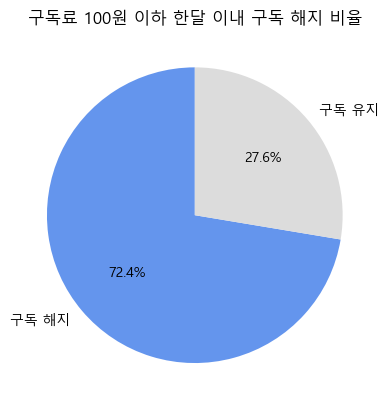

In [182]:
# 구독해지 날짜 한달 이하인 사람 비율 시각화

colors = ['#6495ED', '#DCDCDC']

plt.title('구독료 100원 이하 한달 이내 구독 해지 비율')
plt.pie(merge_sub_unsub_time['period_30'].value_counts(), labels=['구독 해지', '구독 유지'], autopct='%.1f%%', startangle=90, colors=colors)

plt.show()

In [183]:
unsubscribe_time = unsubscribe.copy()

unsubscribe_time['time'] = unsubscribe_time['time'].str.split(' ').str[0]
unsubscribe_time['time'] = pd.to_datetime(unsubscribe_time['time'])

unsubscribe_time['time'].dt.month.value_counts().sort_index()

3     239
4     276
5     399
6     543
7     323
8     259
9     245
10    118
Name: time, dtype: int64

In [184]:
## 구독 데이터의 날짜 데이터 datetime 형식으로 변환

# 원본 카피
subscribe_time = subscribe.copy()

# 시, 분, 초 제거
subscribe_time['created_at'] = subscribe_time['created_at'].str.split(' ').str[0]

# datetime 형변환
subscribe_time['created_at'] = pd.to_datetime(subscribe_time['created_at'])

# format 변경
subscribe_time['created_at'] = subscribe_time['created_at'].dt.strftime("%Y-%m")

# 타겟 별 데이터 분리
subscribe_personal = subscribe_time[subscribe_time['target_customer'] == 'personal']
subscribe_bigBiz = subscribe_time[subscribe_time['target_customer'] == 'bigBiz']
subscribe_middleBiz = subscribe_time[subscribe_time['target_customer'] == 'middleBiz']
subscribe_smallBiz = subscribe_time[subscribe_time['target_customer'] == 'smallBiz']

0        2019-07
1        2019-07
2        2019-07
3        2019-07
4        2019-07
          ...   
31056    2022-10
31057    2022-10
31058    2022-10
31059    2022-10
31060    2022-10
Name: created_at, Length: 31061, dtype: object

In [185]:
subscribe_personal = subscribe_time[subscribe_time['target_customer'] == 'personal']
subscribe_bigBiz = subscribe_time[subscribe_time['target_customer'] == 'bigBiz']
subscribe_middleBiz = subscribe_time[subscribe_time['target_customer'] == 'middleBiz']
subscribe_smallBiz = subscribe_time[subscribe_time['target_customer'] == 'smallBiz']

In [186]:
subscribe_time.groupby('created_at')['price'].sum()

created_at
2019-07      110800.0
2019-08      367500.0
2019-09      549200.0
2019-10      905700.0
2019-11     1063900.0
2019-12     1733100.0
2020-01     1830500.0
2020-02     1641900.0
2020-03     2392800.0
2020-04     3247200.0
2020-05     2976500.0
2020-06     3221900.0
2020-07     4117800.0
2020-08     3852000.0
2020-09     4545000.0
2020-10     5654300.0
2020-11     4852400.0
2020-12     6568060.0
2021-01     7919160.0
2021-02     7476715.0
2021-03     7505040.0
2021-04     7899900.0
2021-05     9691480.0
2021-06    16802360.0
2021-07    12412600.0
2021-08    12123410.0
2021-09    12177950.0
2021-10    15444410.0
2021-11    15616770.0
2021-12    16676350.0
2022-01    14994300.0
2022-02    16875600.0
2022-03    17790640.0
2022-04    16040450.0
2022-05    18477050.0
2022-06    26296740.0
2022-07    28283850.0
2022-08    51423900.0
2022-09    26118490.0
2022-10     7057250.0
Name: price, dtype: float64

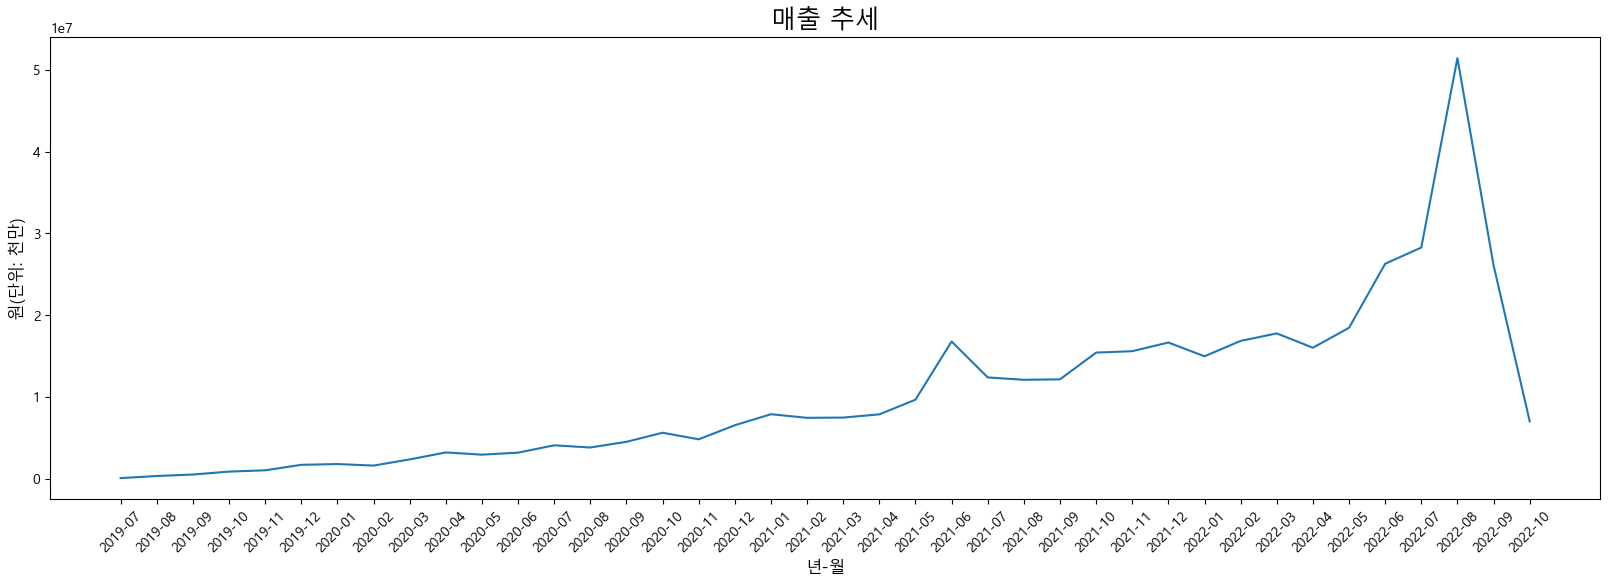

In [187]:
# 날짜별 전체 매출 추세

plt.figure(figsize=(20,6))
plt.title('전체 매출 추세', size=18)
plt.plot(subscribe_time.groupby('created_at')['price'].sum()) # 날짜별 가격 합계
plt.xlabel('년-월', size = 12)
plt.ylabel('원(단위: 천만)', size = 12)
plt.xticks(rotation=45)

plt.show()

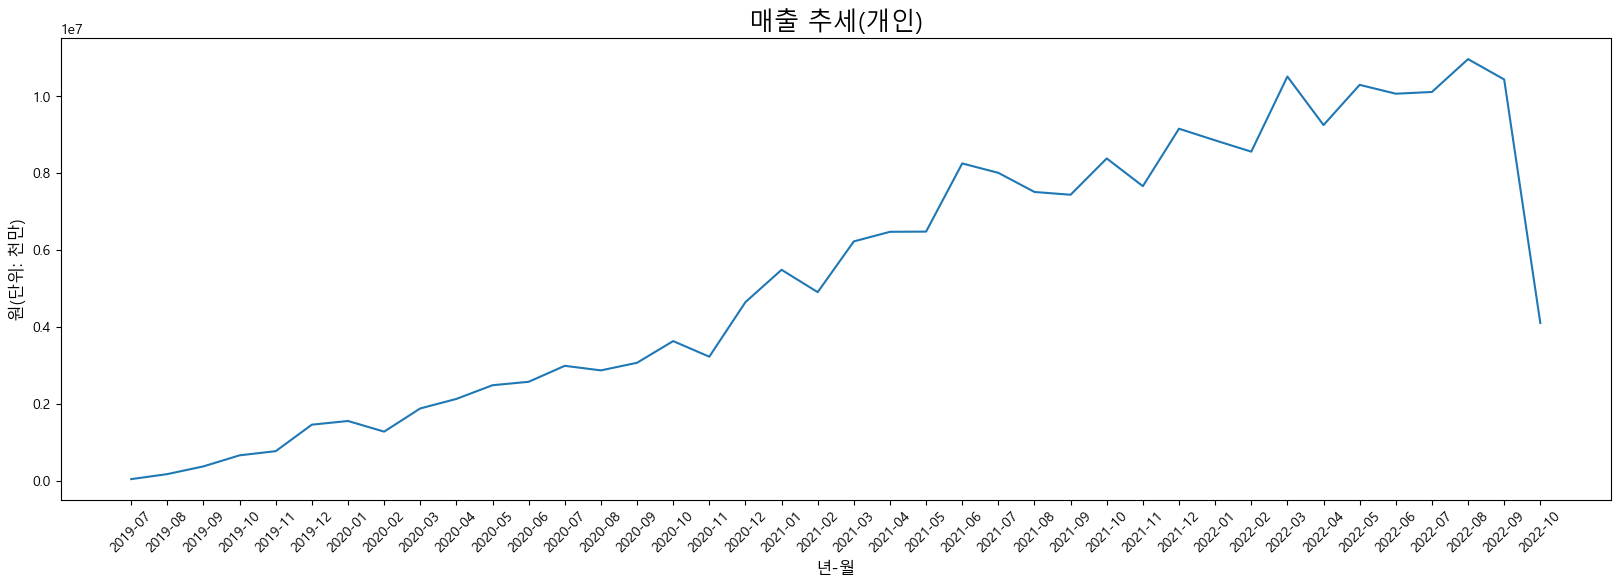

In [207]:
# 날짜별 매출 추세(개인)

plt.figure(figsize=(20,6))
plt.title('매출 추세(개인)', size=18)
plt.plot(subscribe_personal.groupby('created_at')['price'].sum())
plt.xlabel('년-월', size = 12)
plt.ylabel('원(단위: 천만)', size = 12)
plt.xticks(rotation=45)

plt.show()

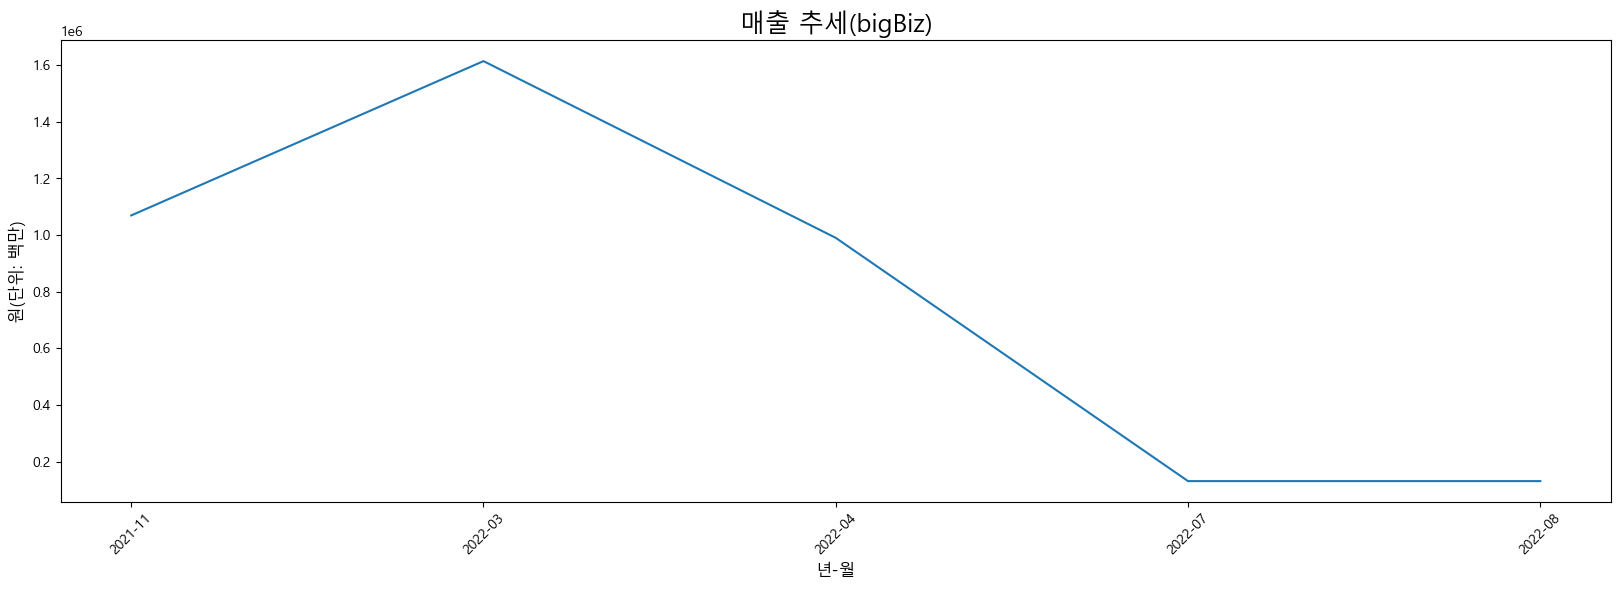

In [189]:
# 날짜별 매출 추세(bigBiz)

plt.figure(figsize=(20,6))
plt.title('매출 추세(bigBiz)', size=18)
plt.plot(subscribe_bigBiz.groupby('created_at')['price'].sum())
plt.xlabel('년-월', size = 12)
plt.ylabel('원(단위: 백만)', size = 12)
plt.xticks(rotation=45)

plt.show()

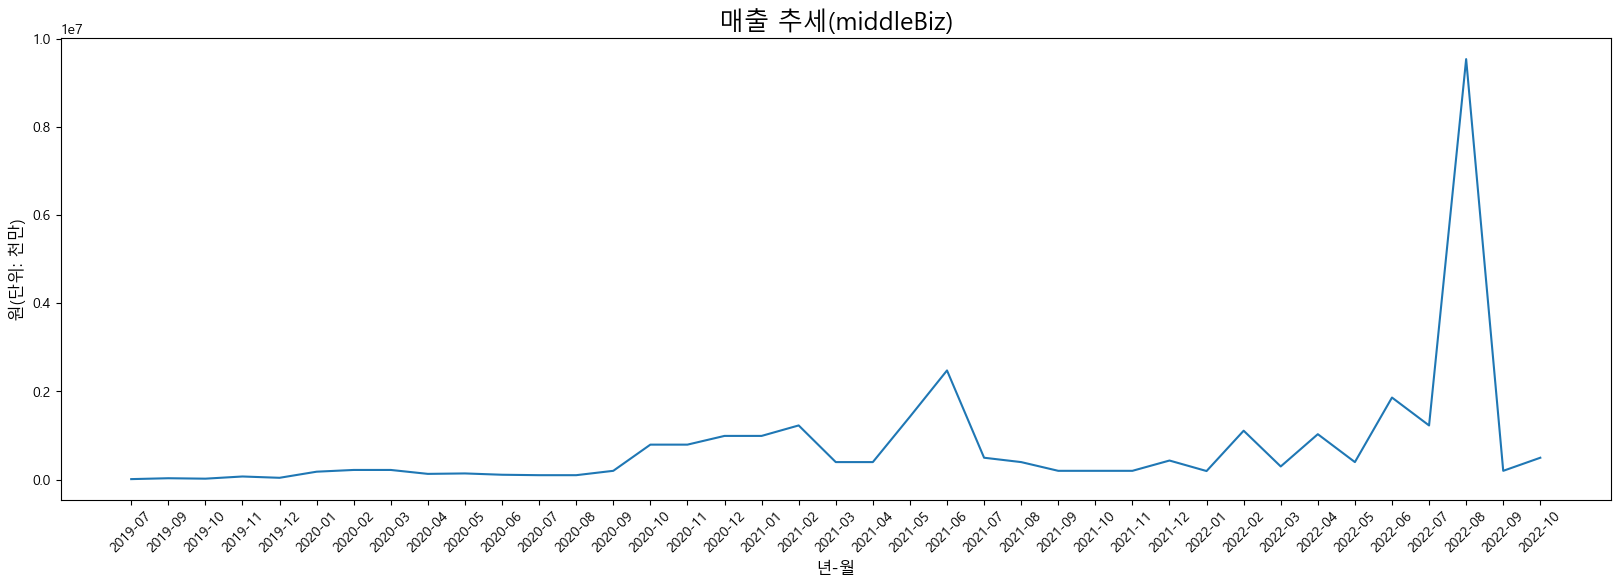

In [190]:
# 날짜별 매출 추세(middleBiz)

plt.figure(figsize=(20,6))
plt.title('매출 추세(middleBiz)', size=18)
plt.plot(subscribe_middleBiz.groupby('created_at')['price'].sum())
plt.xlabel('년-월', size = 12)
plt.ylabel('원(단위: 천만)', size = 12)
plt.xticks(rotation=45)

plt.show()

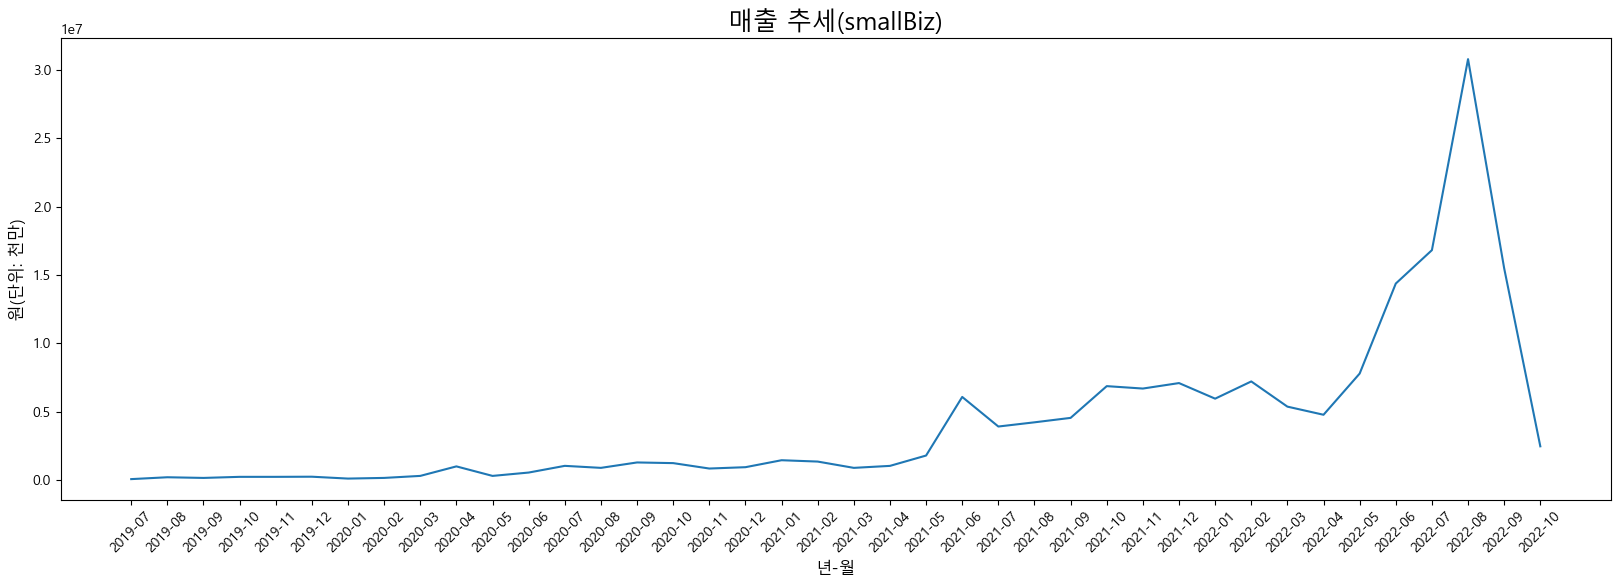

In [191]:
# 날짜별 매출 추세(smallBiz)

plt.figure(figsize=(20,6))
plt.title('매출 추세(smallBiz)', size=18)
plt.plot(subscribe_smallBiz.groupby('created_at')['price'].sum())
plt.xlabel('년-월', size = 12)
plt.ylabel('원(단위: 천만)', size = 12)
plt.xticks(rotation=45)

plt.show()

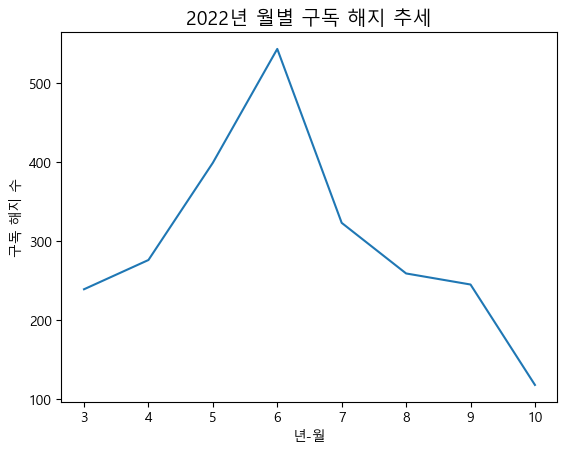

In [192]:
plt.title('2022년 월별 구독 해지 추세', size=14)
plt.xlabel('년-월')
plt.ylabel('구독 해지 수')
plt.plot(unsubscribe_time['time'].dt.month.value_counts().sort_index())

plt.show()

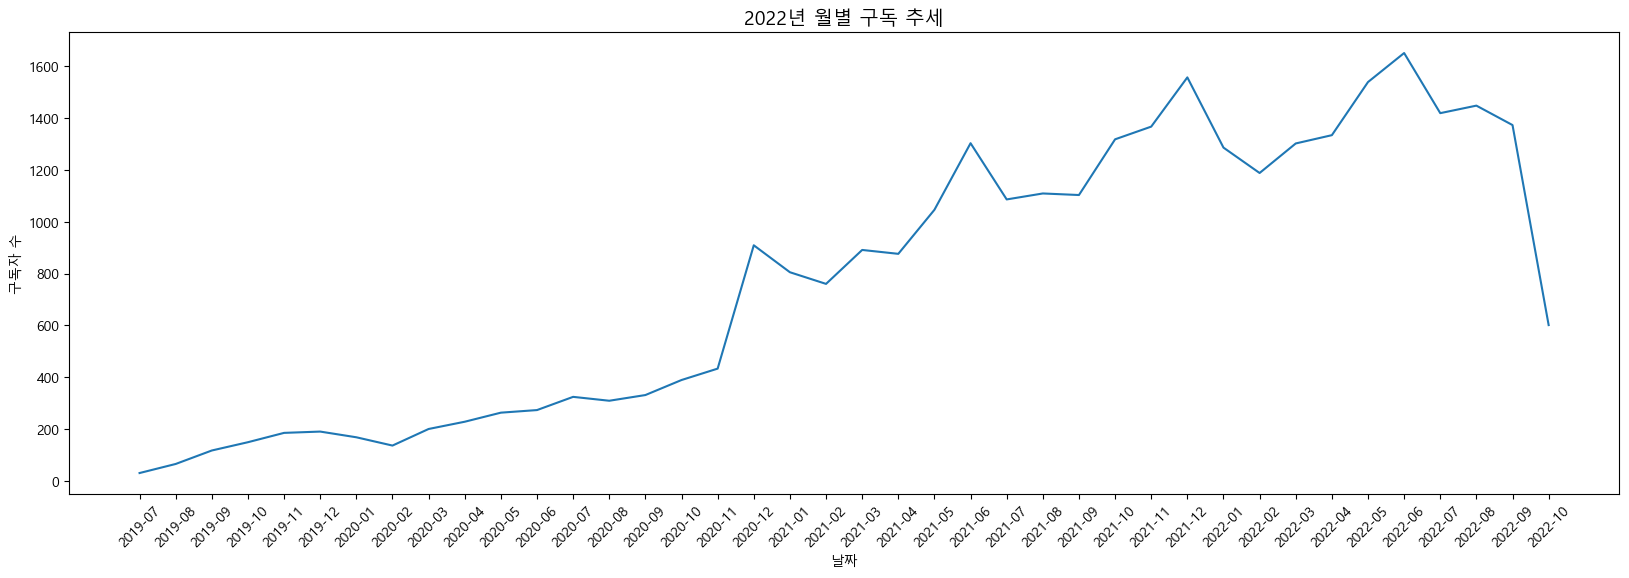

In [193]:
# 22년도 연도별 월별 구독 추세

plt.figure(figsize=(20,6))
plt.title('연도별 월별 구독 추세', size=18)
plt.plot(subscribe_time['created_at'].value_counts().sort_index()) # 연도별 월별 구독자 수 index별로 정렬
plt.xlabel('날짜')
plt.ylabel('구독자 수')
plt.xticks(rotation=45)


plt.show()

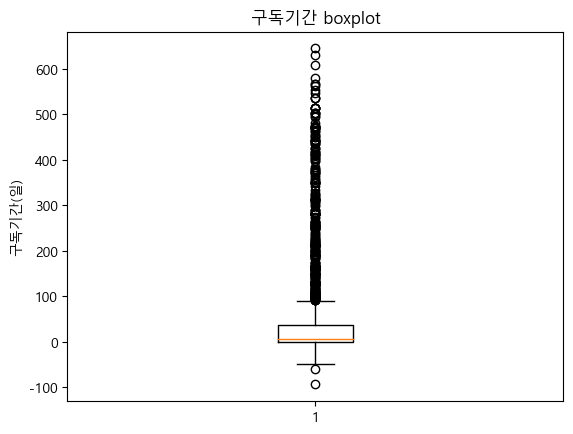

In [194]:
plt.title('구독기간 boxplot')
plt.boxplot(merge_sub_unsub_time['period'].dt.days)
plt.ylabel('구독기간(일)')

plt.show()

In [195]:
merge_sub_unsub_time['period'].dt.days.describe()

count    2360.000000
mean       46.064407
std       100.135271
min       -94.000000
25%         0.000000
50%         6.000000
75%        36.250000
max       645.000000
Name: period, dtype: float64

In [196]:
subscribe_groupby_price_sum = pd.DataFrame(subscribe.groupby('target_customer')['price'].sum().round())
subscribe_groupby_price_sum.columns = ['price_sum']
subscribe_groupby_price_sum

,price_sum
target_customer,
bigBiz,3935340.0
middleBiz,29295300.0
personal,215020305.0
smallBiz,166425030.0


In [197]:
subscribe[subscribe['target_customer'] == 'personal']

,id,user_id,end_date,price,created_at,refund_id,point,target_customer
0,237,6482,2019-08-12 00:00:00,100.0,2019-07-12 18:13:14.541176,NaN,NaN,personal
1,239,6574,2019-08-12 00:00:00,100.0,2019-07-12 19:26:47.48333,NaN,NaN,personal
2,252,6704,2019-08-16 00:00:00,100.0,2019-07-16 09:21:31.787566,NaN,NaN,personal
3,258,4709,2019-08-16 00:00:00,9900.0,2019-07-17 07:00:11.666693,NaN,NaN,personal
4,259,6748,2019-08-17 00:00:00,100.0,2019-07-17 10:33:39.975256,NaN,NaN,personal
...,...,...,...,...,...,...,...,...
31055,330381,118078,2023-10-12 00:00:00,118800.0,2022-10-12 11:32:45.336172,NaN,0.0,personal
31057,330421,117845,2023-10-12 00:00:00,118800.0,2022-10-12 12:05:49.937809,NaN,0.0,personal
31058,330467,118102,2022-10-19 00:00:00,0.0,2022-10-12 13:38:11.534168,NaN,0.0,personal
31059,330471,84676,2022-10-19 00:00:00,0.0,2022-10-12 13:47:14.341867,NaN,0.0,personal
